In [1]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import pandas as pd
import geopandas as gpd
from IPython.display import IFrame
%matplotlib inline
ox.__version__

'1.0.0'

You can configure OSMnx using `ox.config()`. See the [documentation](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.utils.config) for the settings you can configure. For example, by default OSMnx caches all server responses to prevent repeatedly hitting the server for the same query every time you run it. This both makes our code faster on subsequent runs and helps us be a \"good neighbor\" to the server. But you can turn caching off (or back on again) with the `use_cache` parameter. Any parameters not passed to the config function are (re-)set to their original default values whenever you call it. API responses can be cached locally so OSMnx doesn't have to request the same data from the API multiple times: saving bandwidth, increasing speed, and enabling reproducibility.

In [2]:
# turn response caching on and turn on logging to your terminal window
ox.config(log_console=True, use_cache=True)

## 1. Query place boundaries

The `graph_from_place` function uses place boundary geocoding logic to find the network within your place's boundary. Let's look briefly at this place boundary querying before we get to street networks. You can download by cities, neighborhoods, boroughs, counties, states, or countries: anything with geocodable polygon boundaries in OSM's database. Notice the polygon geometries represent political boundaries, not physical/land boundaries. OSMnx will turn your geocoded place (or multiple places) boundaries into a geopandas GeoDataFrame.

In [3]:
# make query an unambiguous dict to help the geocoder find specifically what you're looking for
#note that when getting boundaries for cities, county must be passed 
places = [{#'city' : 'Merida',
           'county': 'Merida',
         'state' : 'Yucatan',
         'country' : 'Mexico'},
         {#'city' : 'Kanasin',
          'county': 'Kanasin',
         'state' : 'Yucatan',
         'country' : 'Mexico'}]

### Get place boundaries from OpenStreetMap

In [16]:
city = ox.geocode_to_gdf(places)

In [17]:
city_proj = ox.project_gdf(city)

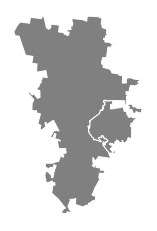

In [18]:
ax = city_proj.plot(facecolor='gray', edgecolor='white')
_ = ax.axis('off')

In [60]:
#visualize the geodataframe
city

geometry  bbox_north  bbox_south  \
0  POLYGON ((-89.80120 21.14914, -89.79693 21.139...   21.191104   20.697106   
1  POLYGON ((-89.59943 20.91507, -89.59938 20.915...   20.982075   20.848589   

   bbox_east  bbox_west   place_id  osm_type   osm_id        lat        lon  \
0 -89.451303 -89.801199  258828268  relation  5961522  20.944344 -89.651198   
1 -89.469842 -89.599434  258788687  relation  5961507  20.915277 -89.541006   

                      display_name     class            type  importance  
0          Mérida, Yucatán, Mexico  boundary  administrative    0.500445  
1  Kanasín, Yucatán, 97370, Mexico  boundary  administrative    0.487614

### Download and model street networks

OSMnx lets you download street network data and build topologically-corrected street networks, project and plot the networks, and save the street network as SVGs, GraphML files, GeoPackages, or shapefiles for later use. The street networks are directed and preserve one-way directionality.

You can download a street network by providing OSMnx any of the following:
  - a bounding box
  - a lat-long point plus a distance
  - an address plus a distance
  - a place name or list of place names (to automatically geocode and get the boundary of)
  - a polygon of the desired street network's boundaries
  - a .osm formatted xml file
  
You can also specify several different network types:
  - 'drive' - get drivable public streets (but not service roads)
  - 'drive_service' - get drivable streets, including service roads
  - 'walk' - get all streets and paths that pedestrians can use (this network type ignores one-way directionality)
  - 'bike' - get all streets and paths that cyclists can use
  - 'all' - download all non-private OSM streets and paths (this is the default network type unless you specify a different one)
  - 'all_private' - download all OSM streets and paths, including private-access ones

In [65]:
places = [{#'city' : 'Merida',
           'county': 'Merida',
         'state' : 'Yucatan',
         'country' : 'Mexico'},
         {#'city' : 'Kanasin',
          'county': 'Kanasin',
         'state' : 'Yucatan',
         'country' : 'Mexico'}]

In [70]:
# get drivable public streets network, aka road network, without service roads, e.g. private, parking lots, etc.
# use retain_all if you want to keep all disconnected subgraphs (e.g. when your places aren't adjacent)
# download and project a street network
G = ox.graph_from_place(places, network_type='drive', retain_all=False, custom_filter=None)

In [3]:
# save/load graph as a graphml file: this is the best way to save your model
# for subsequent work later
# if you want to work with your model in gephi, use gephi compatibility mode

filepath = './networks/merida-kanasin-road.graphml'
#ox.save_graphml(G, filepath=filepath, gephi=False)
G = ox.load_graphml(filepath)



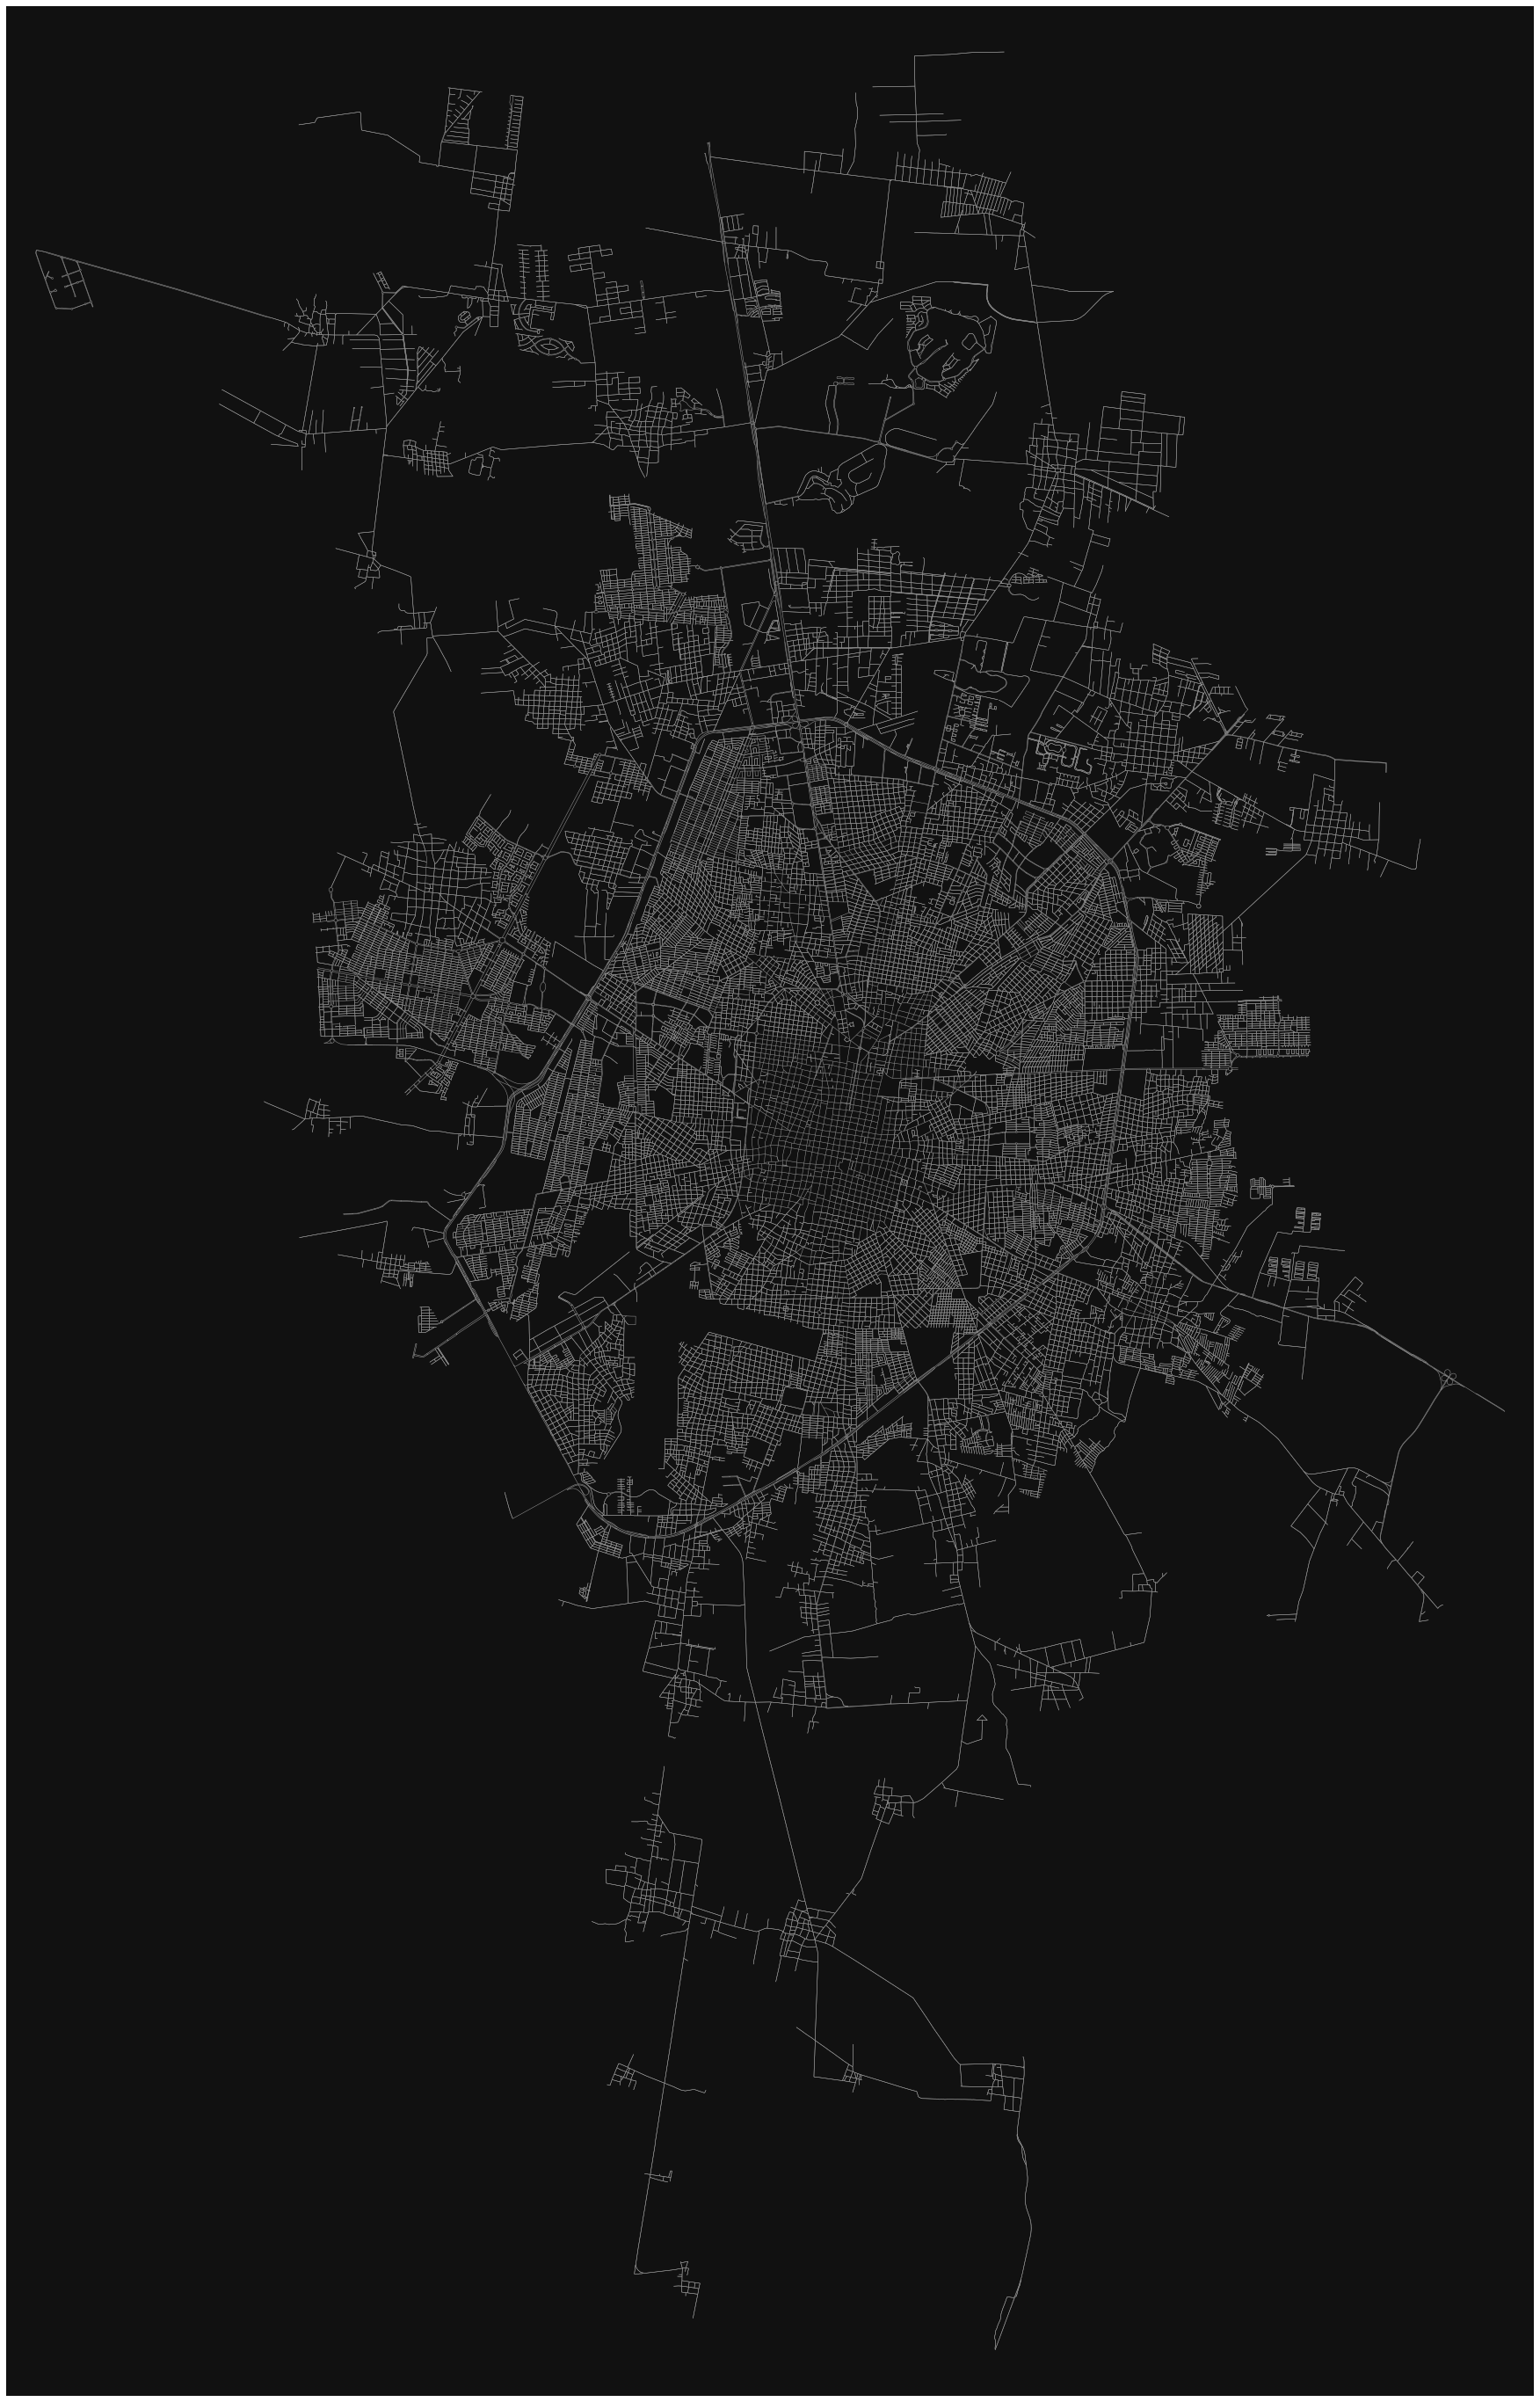

In [75]:
#fig, ax = ox.plot_graph(G, node_size=0, edge_color='w', edge_linewidth=0.2)
fig, ax = ox.plot_graph(G, 
                        #bgcolor='k', 
                        node_size=0, 
                        #node_color='#999999', 
                        #node_edgecolor='none', 
                        #node_zorder=2,
                        #edge_color='#555555', 
                        edge_linewidth=0.5, 
                        #edge_alpha=1, 
                        figsize=(50,50))
#fig.savefig('images/merida-roads.png', dpi=700, bbox_inches='tight')
plt.close()

### Importing shapefiles containing polygons of Colonias de Mexico using GeoPandas

In [3]:
#read the files from the Colonias folder using geopandas just as if we were using only pandas
colonias = gpd.read_file('input_data/coloniasmexico/Colonias/')

In [4]:
colonias.head()

OBJECTID POSTALCODE         ST_NAME        MUN_NAME          SETT_NAME  \
0         1      20000  AGUASCALIENTES  AGUASCALIENTES        ZONA CENTRO   
1         2      20010  AGUASCALIENTES  AGUASCALIENTES   OLIVARES SANTANA   
2         3      20010  AGUASCALIENTES  AGUASCALIENTES  RAMON ROMO FRANCO   
3         4      20010  AGUASCALIENTES  AGUASCALIENTES       SAN CAYETANO   
4         5      20010  AGUASCALIENTES  AGUASCALIENTES    COLINAS DEL RIO   

         SETT_TYPE         AREA  Shape_Leng  Shape_Area  \
0          COLONIA  722654869.0    0.057960    0.000137   
1  FRACCIONAMIENTO  722654869.0    0.031534    0.000023   
2  FRACCIONAMIENTO  722654869.0    0.007414    0.000002   
3  FRACCIONAMIENTO  722654869.0    0.028007    0.000044   
4  FRACCIONAMIENTO  722654869.0    0.031292    0.000048   

                                            geometry  
0  POLYGON Z ((-102.28709 21.88362 0.00000, -102....  
1  POLYGON Z ((-102.31287 21.89787 0.00000, -102....  
2  POLYGON Z ((-102.31221 21.89372 0.00000, -102....  
3  POLYGON Z ((-102.30707 21.90146 0.00000, -102....  
4  POLYGON Z ((-102.31689 21.89465 0.00000, -102....

In [5]:
#observe useful info of each column in the dataframe
colonias.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58227 entries, 0 to 58226
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    58227 non-null  int64   
 1   POSTALCODE  58227 non-null  object  
 2   ST_NAME     58227 non-null  object  
 3   MUN_NAME    58227 non-null  object  
 4   SETT_NAME   58227 non-null  object  
 5   SETT_TYPE   58227 non-null  object  
 6   AREA        58227 non-null  float64 
 7   Shape_Leng  58227 non-null  float64 
 8   Shape_Area  58227 non-null  float64 
 9   geometry    58227 non-null  geometry
dtypes: float64(3), geometry(1), int64(1), object(5)
memory usage: 4.4+ MB


In [20]:
#drop the OBJECTID column from the colonias of mexico dataframe
colonias.drop(columns=['OBJECTID'], inplace=True)

In [21]:
#query to filter only the colonias from the Yucatan state
colonias_yucatan = colonias[(colonias['ST_NAME']=='YUCATAN')]

In [22]:
colonias_yucatan

POSTALCODE  ST_NAME MUN_NAME      SETT_NAME SETT_TYPE         AREA  \
56426      97825  YUCATAN    ABALÁ          ABALA    PUEBLO  700004445.0   
56427      97380  YUCATAN  ACANCEH        ACANCEH    PUEBLO  700004446.0   
56428      97990  YUCATAN     AKIL           AKIL    PUEBLO  700004447.0   
56429      97990  YUCATAN     AKIL         CENTRO    PUEBLO  700004447.0   
56430      97450  YUCATAN     BACA           BACA    PUEBLO  700004448.0   
...          ...      ...      ...            ...       ...          ...   
57215      97922  YUCATAN  YAXCABÁ      YOKDZONOT    PUEBLO  700001791.0   
57216      97923  YUCATAN  YAXCABÁ    LIBRE UNION    PUEBLO  700001791.0   
57217      97924  YUCATAN  YAXCABÁ        YAXUNAH    PUEBLO  700001791.0   
57218      97925  YUCATAN  YAXCABÁ   KANKABDZONOT    PUEBLO  700001791.0   
57219      97425  YUCATAN   YOBAÍN  YOBAÍN CENTRO    PUEBLO  700033699.0   

       Shape_Leng  Shape_Area  \
56426    0.049039    0.000064   
56427    0.102653    0.000548   
56428    0.198995    0.001248   
56429    0.020045    0.000023   
56430    0.089344    0.000237   
...           ...         ...   
57215    0.019157    0.000020   
57216    0.038392    0.000041   
57217    0.017072    0.000014   
57218    0.021147    0.000019   
57219    0.046130    0.000084   

                                                geometry  
56426  POLYGON Z ((-89.68047 20.65040 0.00000, -89.68...  
56427  POLYGON Z ((-89.46891 20.81472 0.00000, -89.46...  
56428  POLYGON Z ((-89.37038 20.27926 0.00000, -89.36...  
56429  POLYGON Z ((-89.34468 20.26434 0.00000, -89.34...  
56430  POLYGON Z ((-89.40608 21.10913 0.00000, -89.40...  
...                                                  ...  
57215  POLYGON Z ((-88.73336 20.70711 0.00000, -88.73...  
57216  POLYGON Z ((-88.81322 20.70681 0.00000, -88.81...  
57217  POLYGON Z ((-88.67712 20.54384 0.00000, -88.67...  
57218  POLYGON Z ((-88.70678 20.51053 0.00000, -88.70...  
57219  POLYGON Z ((-89.10930 21.23437 0.00000, -89.10...  

[793 rows x 9 columns]

In [14]:
#query to filter only the colonias from Merida municipality of Yucatan state
colonias_yucatan_merida = colonias[(colonias['ST_NAME']=='YUCATAN') & (colonias['MUN_NAME'] == 'MÉRIDA')]

In [15]:
#query to filter only the colonias from Kanasin municipality of Yucatan state
colonias_yucatan_kanasin = colonias[(colonias['ST_NAME']=='YUCATAN') & (colonias['MUN_NAME'] == 'KANASÍN')]

In [16]:
colonias_yucatan_merida.head()

OBJECTID POSTALCODE  ST_NAME MUN_NAME                        SETT_NAME  \
56515     56516      97000  YUCATAN   MÉRIDA             BARRIO SAN SEBASTIAN   
56516     56517      97000  YUCATAN   MÉRIDA                 BARRIO SANTA ANA   
56517     56518      97000  YUCATAN   MÉRIDA                  BARRIO SANTIAGO   
56518     56519      97000  YUCATAN   MÉRIDA  FRACC JARDINES DE SAN SEBASTIAN   
56519     56520      97000  YUCATAN   MÉRIDA                  FRACC LA QUINTA   

             SETT_TYPE         AREA  Shape_Leng  Shape_Area  \
56515  FRACCIONAMIENTO  724836804.0    0.028660    0.000038   
56516  FRACCIONAMIENTO  724836804.0    0.031112    0.000051   
56517  FRACCIONAMIENTO  724836804.0    0.023338    0.000034   
56518  FRACCIONAMIENTO  724836804.0    0.005479    0.000002   
56519  FRACCIONAMIENTO  724836804.0    0.004742    0.000001   

                                                geometry  
56515  POLYGON Z ((-89.63250 20.96072 0.00000, -89.63...  
56516  POLYGON Z ((-89.62424 20.97568 0.00000, -89.62...  
56517  POLYGON Z ((-89.62914 20.96978 0.00000, -89.62...  
56518  POLYGON Z ((-89.63250 20.96072 0.00000, -89.63...  
56519  POLYGON Z ((-89.63478 20.97566 0.00000, -89.63...

In [9]:
colonias_yucatan_merida.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 578 entries, 56515 to 57093
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    578 non-null    int64   
 1   POSTALCODE  578 non-null    object  
 2   ST_NAME     578 non-null    object  
 3   MUN_NAME    578 non-null    object  
 4   SETT_NAME   578 non-null    object  
 5   SETT_TYPE   578 non-null    object  
 6   AREA        578 non-null    float64 
 7   Shape_Leng  578 non-null    float64 
 8   Shape_Area  578 non-null    float64 
 9   geometry    578 non-null    geometry
dtypes: float64(3), geometry(1), int64(1), object(5)
memory usage: 49.7+ KB


In [10]:
colonias_yucatan_kanasin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 24 entries, 56482 to 56505
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    24 non-null     int64   
 1   POSTALCODE  24 non-null     object  
 2   ST_NAME     24 non-null     object  
 3   MUN_NAME    24 non-null     object  
 4   SETT_NAME   24 non-null     object  
 5   SETT_TYPE   24 non-null     object  
 6   AREA        24 non-null     float64 
 7   Shape_Leng  24 non-null     float64 
 8   Shape_Area  24 non-null     float64 
 9   geometry    24 non-null     geometry
dtypes: float64(3), geometry(1), int64(1), object(5)
memory usage: 2.1+ KB


### Import shapefiles containing information of the INEGI 2010

#### Population by municipality 

In [26]:
municipal_inegi = gpd.read_file('input_data/00_SCINCE_zip/00/municipal.dbf')

In [28]:
municipal_inegi.head()

CVEGEO         NOM_ENT         NOM_MUN      POB1     POB2  POB2_R     POB3  \
0  01001  Aguascalientes  Aguascalientes  797010.0  44873.0     5.6  76707.0   
1  01002  Aguascalientes        Asientos   45492.0   3206.0     7.0   5285.0   
2  01003  Aguascalientes        Calvillo   54136.0   3433.0     6.3   5809.0   
3  01004  Aguascalientes           Cosío   15042.0    967.0     6.4   1651.0   
4  01005  Aguascalientes     Jesús María   99590.0   7044.0     7.1  11982.0   

   POB3_R     POB4  POB4_R  ...     POB78  POB78_R    POB79  POB79_R    POB80  \
0     9.6  47951.0     6.0  ...  188761.0     48.8  27248.0      7.1  17571.0   
1    11.6   3175.0     7.0  ...    9720.0     43.2   1813.0      8.1   1334.0   
2    10.7   3561.0     6.6  ...   12136.0     46.2   2756.0     10.5   1982.0   
3    11.0   1033.0     6.9  ...    3231.0     44.1    579.0      7.9    418.0   
4    12.0   7377.0     7.4  ...   21527.0     43.9   2679.0      5.5   1810.0   

   POB80_R    POB81  POB81_R  OID  \
0      4.5  10818.0      2.8    1   
1      5.9    965.0      4.3    2   
2      7.6   1358.0      5.2    3   
3      5.7    290.0      4.0    4   
4      3.7   1133.0      2.3    5   

                                            geometry  
0  POLYGON ((2489072.505 1115771.584, 2489352.774...  
1  POLYGON ((2494680.262 1141224.506, 2494749.947...  
2  POLYGON ((2429607.454 1120262.254, 2429071.900...  
3  POLYGON ((2470517.824 1155028.587, 2470552.249...  
4  POLYGON ((2465526.729 1114740.466, 2465752.546...  

[5 rows x 161 columns]

In [31]:
#select only the columns that are useful. 
#POB1 is the total population according to the data dictionary
pop_municipal = municipal_inegi[['NOM_ENT', 'NOM_MUN', 'POB1', 'geometry']]

In [32]:
pop_municipal

NOM_ENT                NOM_MUN      POB1  \
0     Aguascalientes         Aguascalientes  797010.0   
1     Aguascalientes               Asientos   45492.0   
2     Aguascalientes               Calvillo   54136.0   
3     Aguascalientes                  Cosío   15042.0   
4     Aguascalientes            Jesús María   99590.0   
...              ...                    ...       ...   
2451       Zacatecas          Villa Hidalgo   18490.0   
2452       Zacatecas             Villanueva   29395.0   
2453       Zacatecas              Zacatecas  138176.0   
2454       Zacatecas               Trancoso   16934.0   
2455       Zacatecas  Santa María de la Paz    2821.0   

                                               geometry  
0     POLYGON ((2489072.505 1115771.584, 2489352.774...  
1     POLYGON ((2494680.262 1141224.506, 2494749.947...  
2     POLYGON ((2429607.454 1120262.254, 2429071.900...  
3     POLYGON ((2470517.824 1155028.587, 2470552.249...  
4     POLYGON ((2465526.729 1114740.466, 2465752.546...  
...                                                 ...  
2451  POLYGON ((2531223.367 1166188.348, 2531242.386...  
2452  POLYGON ((2420011.779 1183552.394, 2420043.461...  
2453  POLYGON ((2421707.751 1202019.972, 2421780.085...  
2454  POLYGON ((2476976.320 1198274.003, 2476566.139...  
2455  POLYGON ((2356749.001 1062854.583, 2357430.999...  

[2456 rows x 4 columns]

#### Population by state

In [33]:
state_inegi = gpd.read_file('input_data/00_SCINCE_zip/00/estatal.dbf')

In [39]:
state_inegi.head()

CVEGEO                NOMBRE     POB1    POB2  POB2_R    POB3  POB3_R  \
0     01        Aguascalientes  1184996   71484     6.0  121557    10.3   
1     02       Baja California  3155070  170792     5.4  293234     9.3   
2     03   Baja California Sur   637026   36388     5.7   60758     9.5   
3     04              Campeche   822441   45537     5.5   76925     9.4   
4     05  Coahuila de Zaragoza  2748391  151918     5.5  258246     9.4   

     POB4  POB4_R    POB5  ...   POB78  POB78_R   POB79  POB79_R  POB80  \
0   75453     6.4  154348  ...  272459     47.2   41163      7.1  27477   
1  182211     5.8  367940  ...  817531     51.4  101804      6.4  65653   
2   36255     5.7   72035  ...  169932     52.2   20896      6.4  13323   
3   46836     5.7   95136  ...  205395     50.4   34128      8.4  23517   
4  158570     5.8  328429  ...  691959     50.7  111157      8.1  73690   

   POB80_R  POB81  POB81_R  OID  \
0      4.8  17582      3.0    1   
1      4.1  40567      2.5    2   
2      4.1   8098      2.5    3   
3      5.8  15922      3.9    4   
4      5.4  46863      3.4    5   

                                            geometry  
0  POLYGON ((2470517.824 1155028.587, 2470552.249...  
1  MULTIPOLYGON (((1458026.171 1855728.155, 14578...  
2  MULTIPOLYGON (((1694646.290 1227655.310, 16946...  
3  MULTIPOLYGON (((3702830.928 1030965.604, 37034...  
4  POLYGON ((2469954.193 1978522.993, 2469982.807...  

[5 rows x 160 columns]

In [40]:
pop_state = state_inegi[['NOMBRE', 'POB1', 'geometry']]

In [42]:
pop_state.head()

NOMBRE     POB1  \
0        Aguascalientes  1184996   
1       Baja California  3155070   
2   Baja California Sur   637026   
3              Campeche   822441   
4  Coahuila de Zaragoza  2748391   

                                            geometry  
0  POLYGON ((2470517.824 1155028.587, 2470552.249...  
1  MULTIPOLYGON (((1458026.171 1855728.155, 14578...  
2  MULTIPOLYGON (((1694646.290 1227655.310, 16946...  
3  MULTIPOLYGON (((3702830.928 1030965.604, 37034...  
4  POLYGON ((2469954.193 1978522.993, 2469982.807...

#### Plot colonias of Merida polygons

In [12]:
polygon = colonias_yucatan_merida['geometry'].iloc[6]

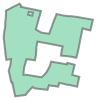

In [13]:
polygon

Plot Merida Centro

In [14]:
colonias_yucatan_merida.iloc[6]

OBJECTID                                                  56522
POSTALCODE                                                97000
ST_NAME                                                 YUCATAN
MUN_NAME                                                 MÉRIDA
SETT_NAME                                         MERIDA CENTRO
SETT_TYPE                                       FRACCIONAMIENTO
AREA                                           724836804.000000
Shape_Leng                                             0.180228
Shape_Area                                             0.000478
geometry      POLYGON Z ((-89.62275000031212 20.962209999691...
Name: 56521, dtype: object

In [15]:
G2 = ox.graph_from_polygon(polygon, network_type='drive')

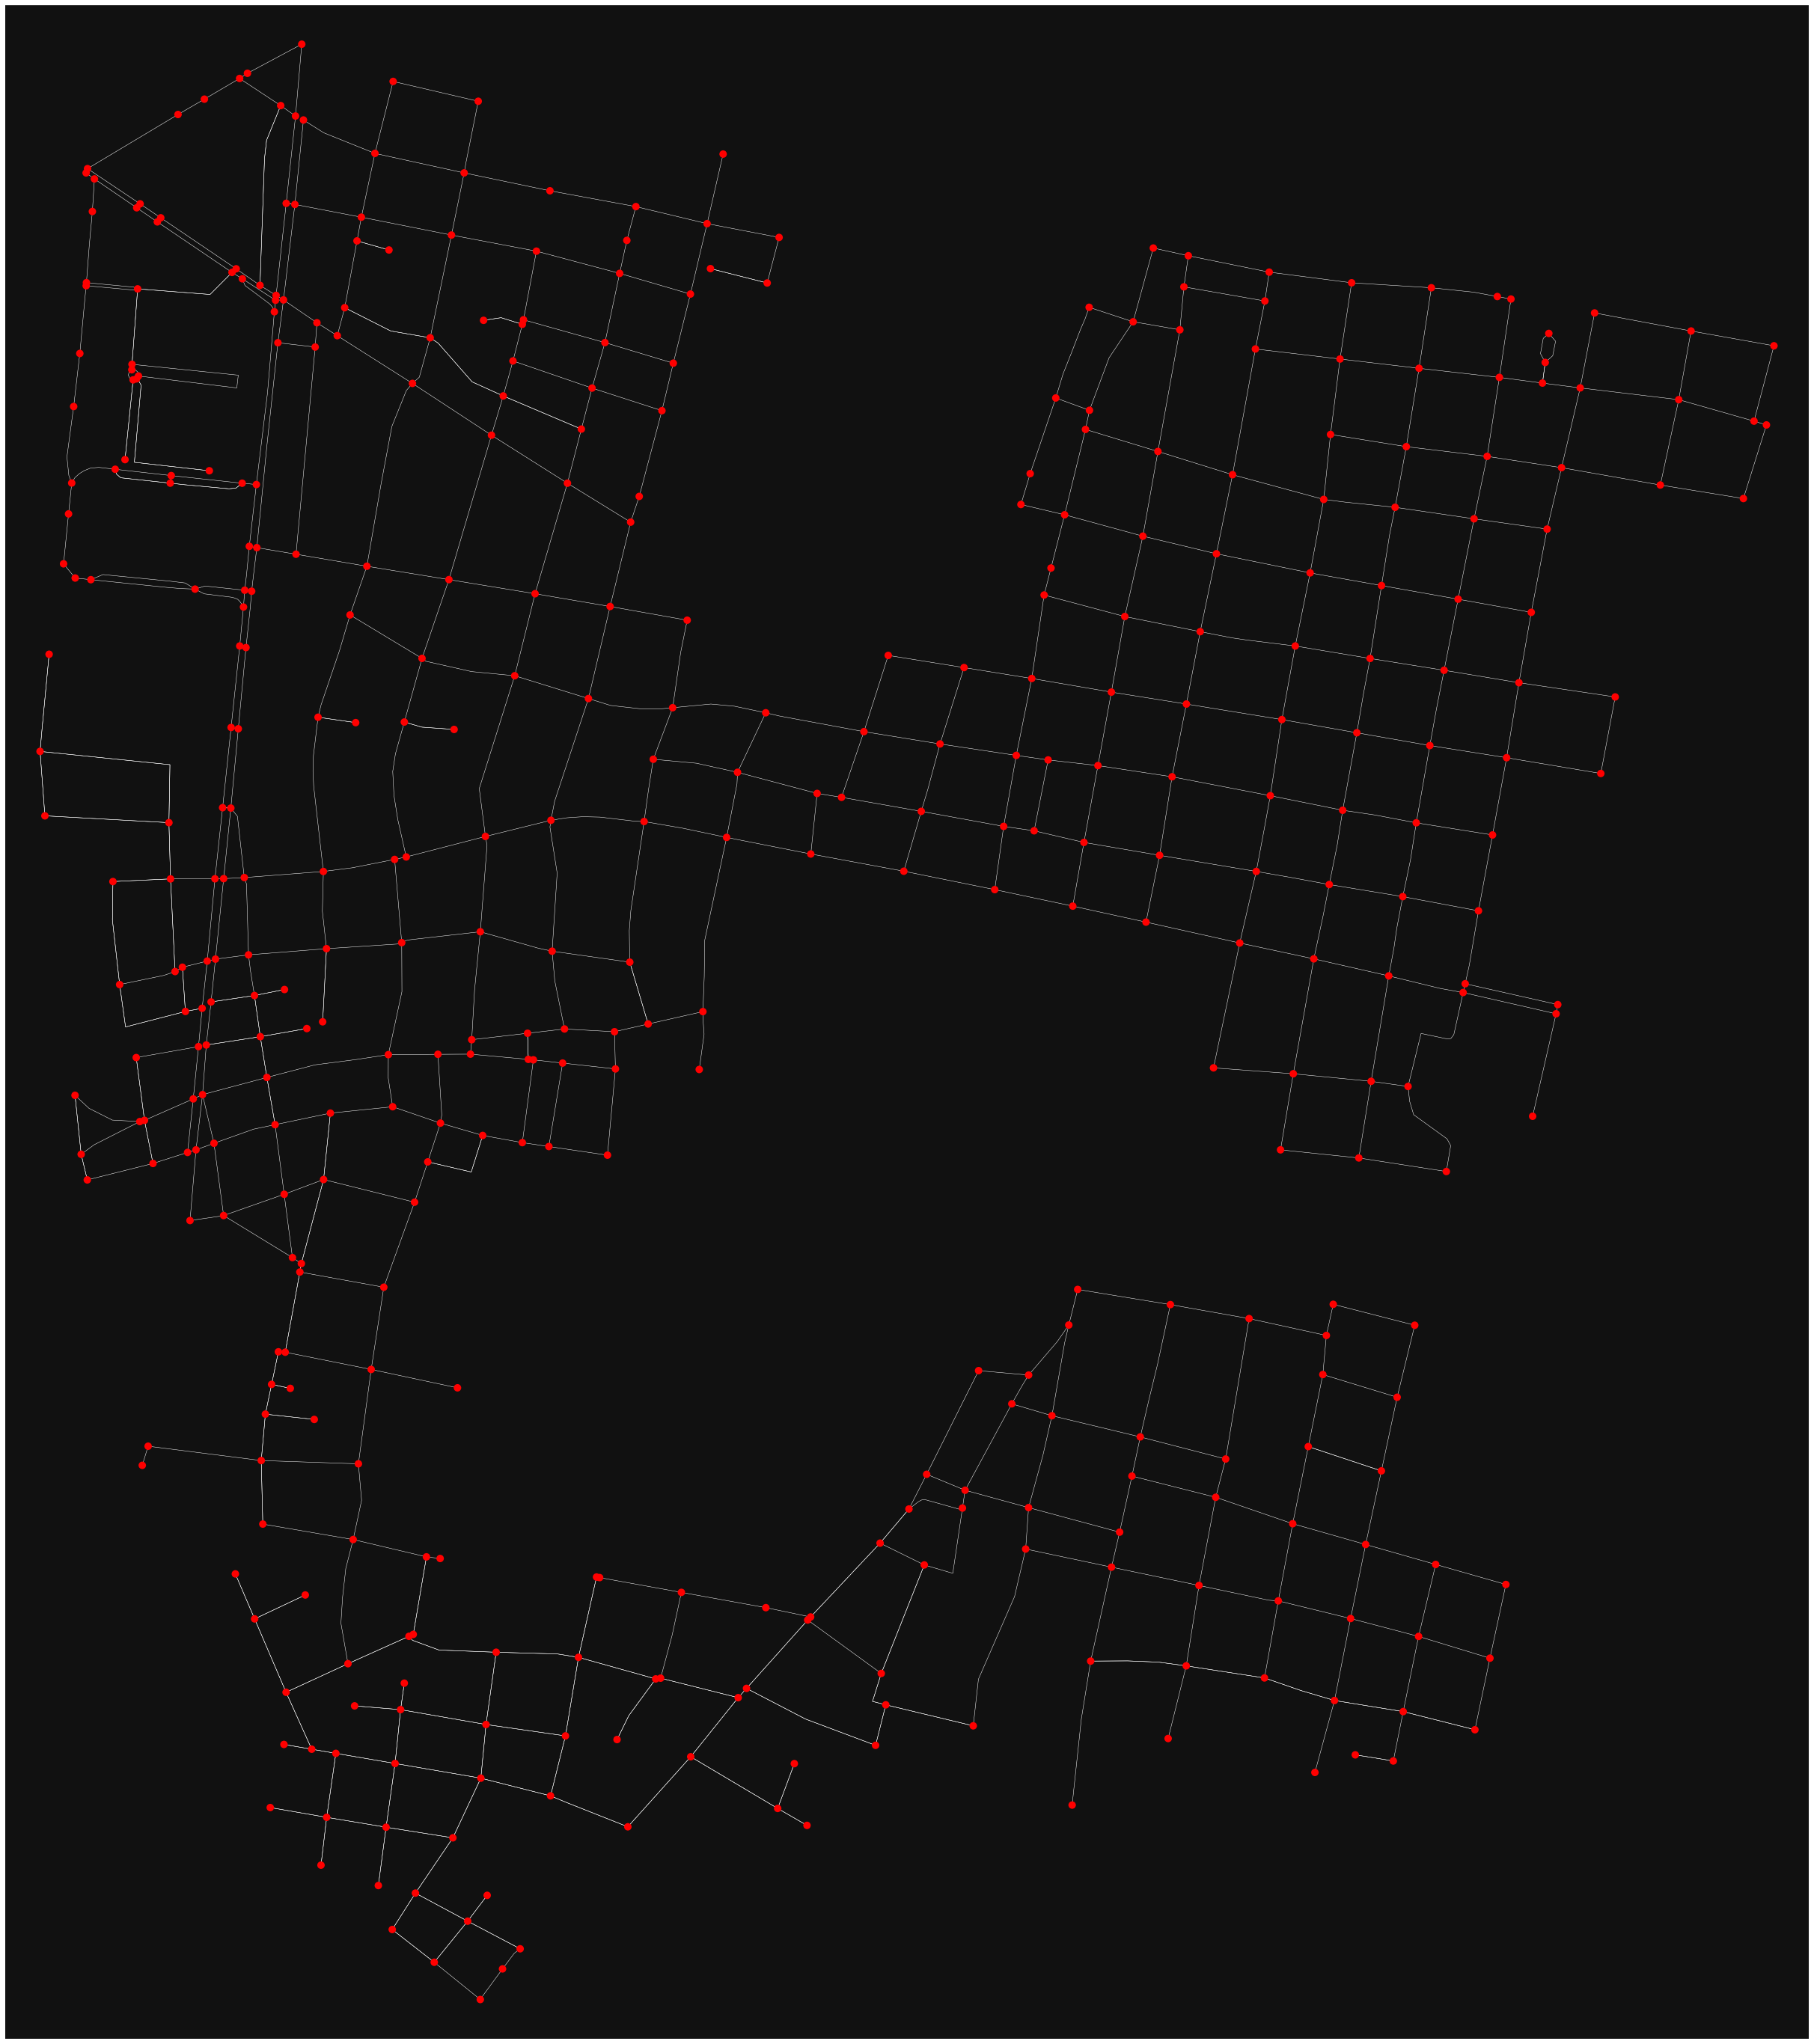

In [16]:
fig, ax = ox.plot_graph(G2, 
                        #bgcolor='k', 
                        node_size=100, 
                        node_color='red', 
                        #node_edgecolor='none', 
                        #node_zorder=2,
                        edge_color='white', 
                        edge_linewidth=0.5, 
                        #edge_alpha=1, 
                        figsize=(50,50))
#fig.savefig('images/merida-roads.png', dpi=700, bbox_inches='tight')
plt.close()

In [ ]:
# plot the network, but do not show it or close it yet
#fig, ax = ox.plot_graph(G, show=False, close=False, bgcolor='#333333', edge_color='w', edge_linewidth=0.3, node_size=0)

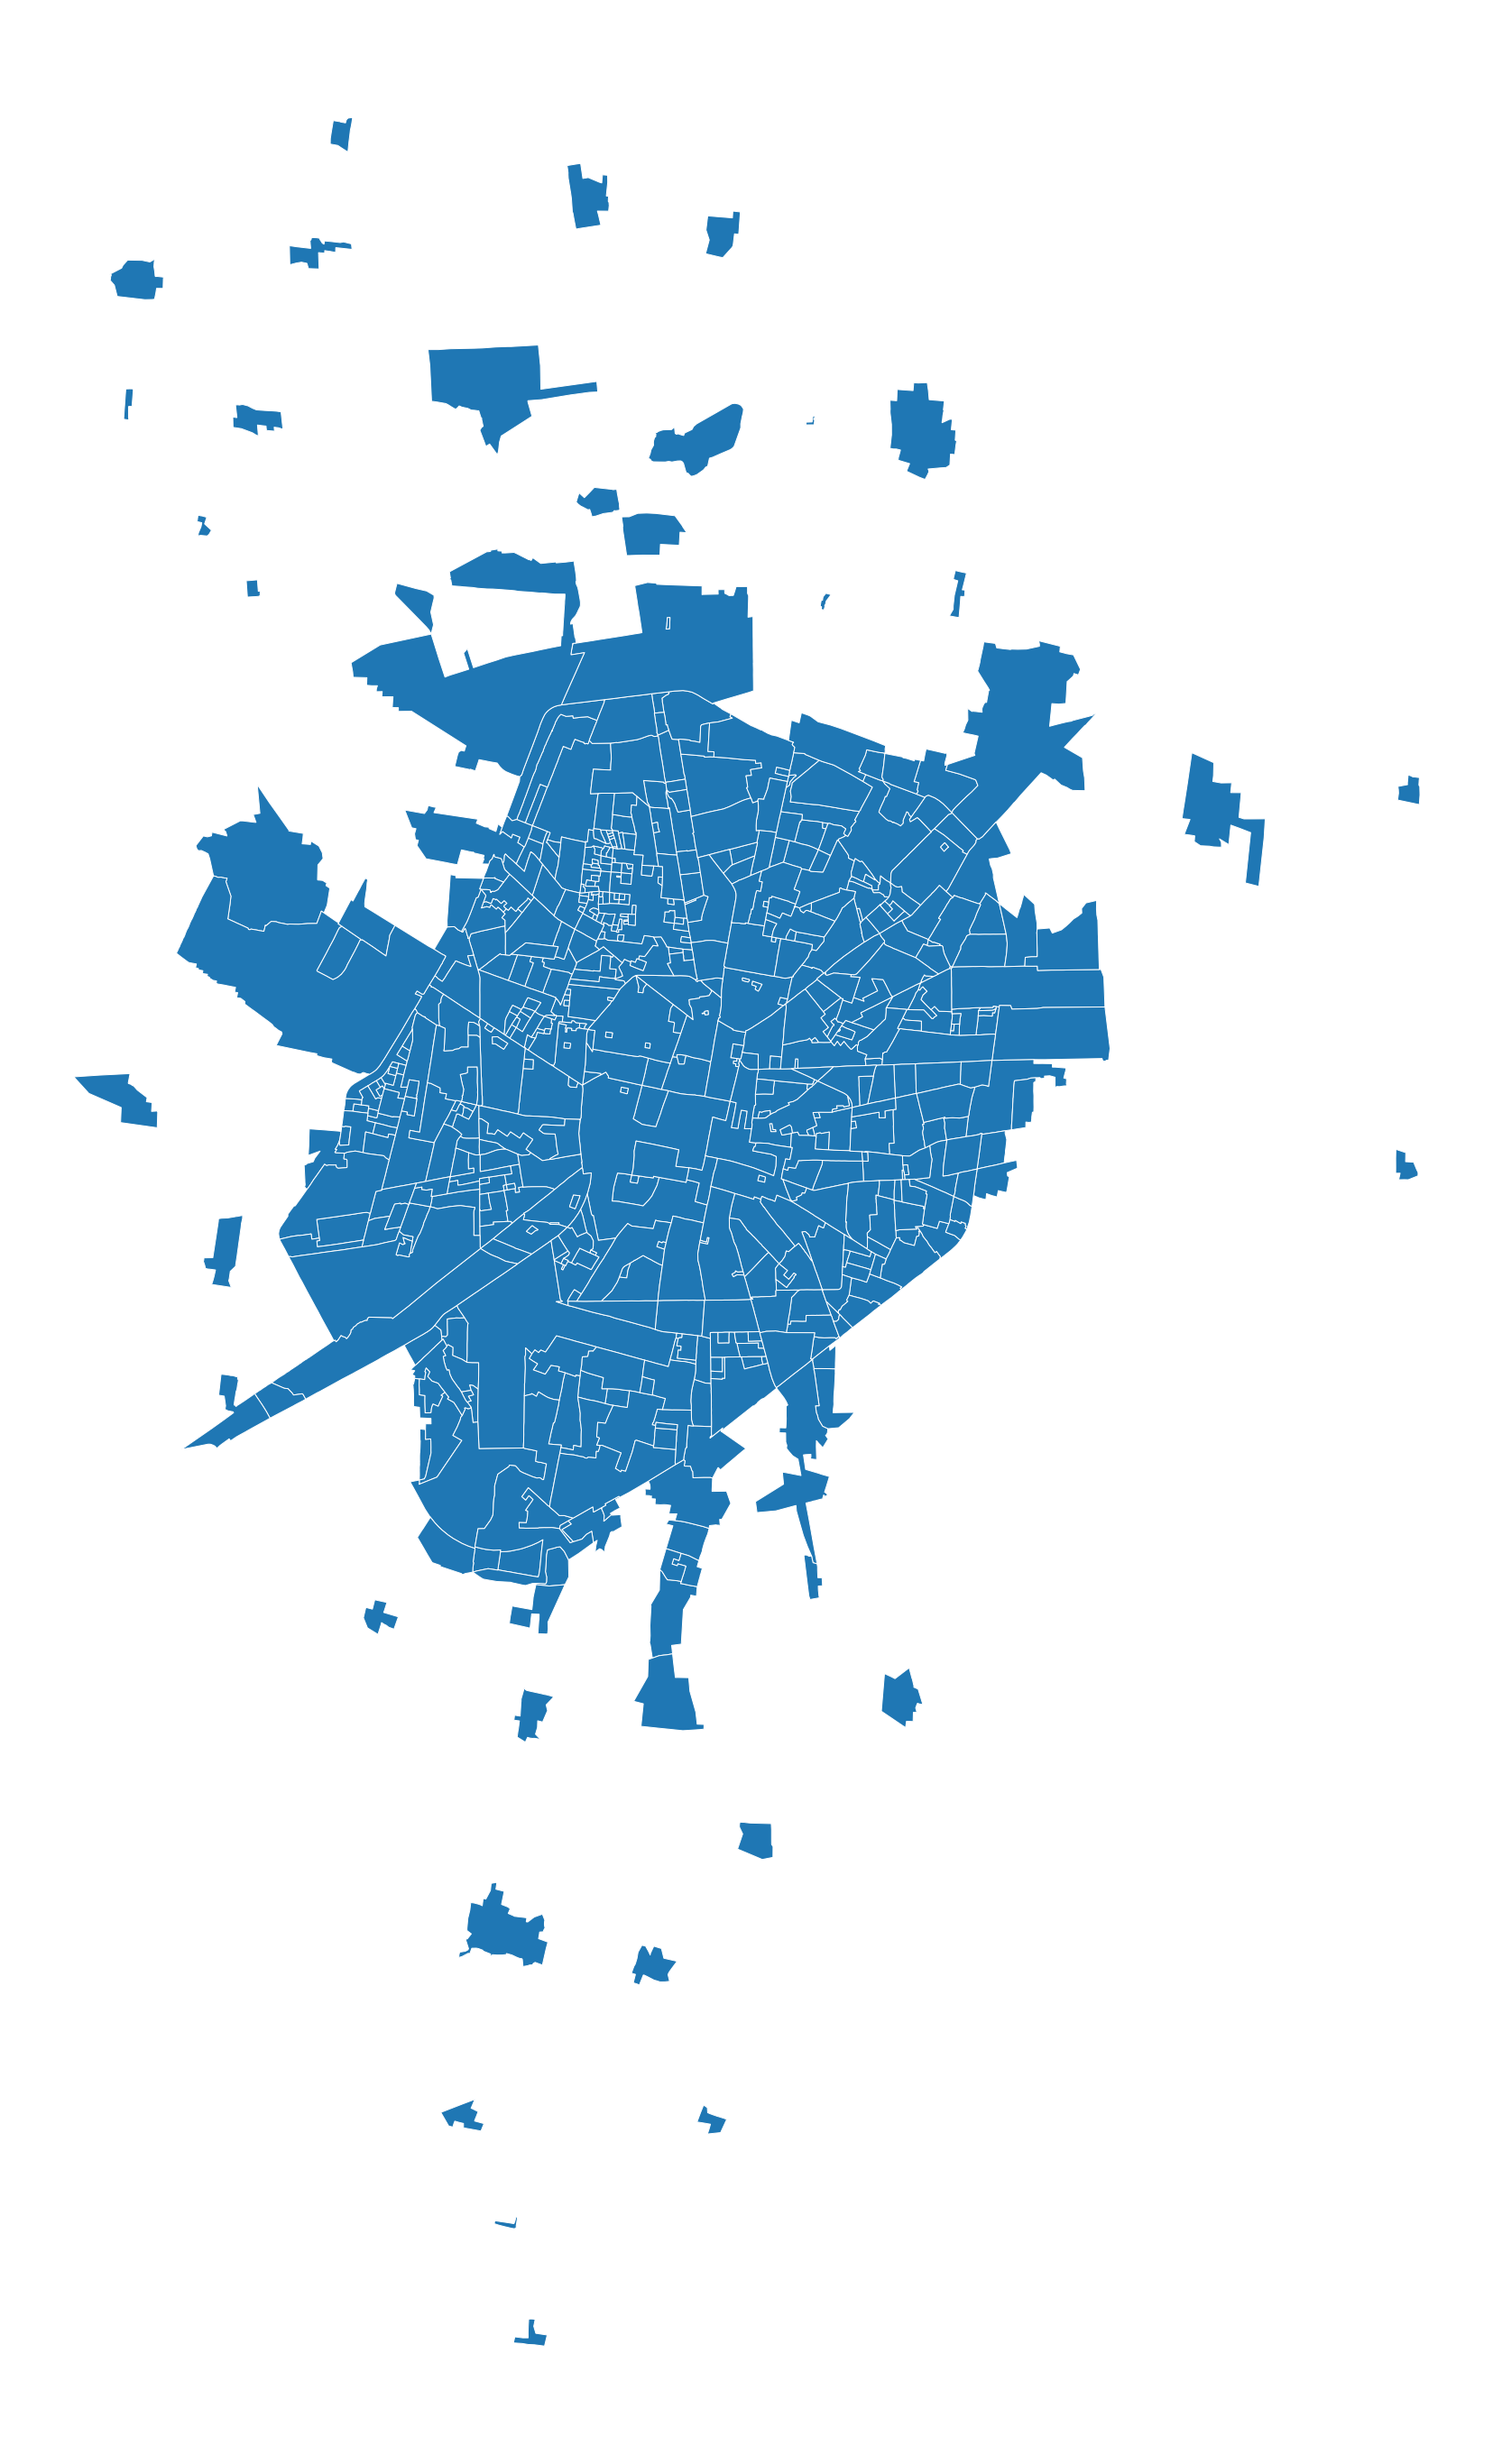

In [17]:
#plot all geometries of the geodataframe using geopandas
ax = colonias_yucatan_merida['geometry'].plot(figsize=(50,50), edgecolor='white')
_ = ax.axis('off')

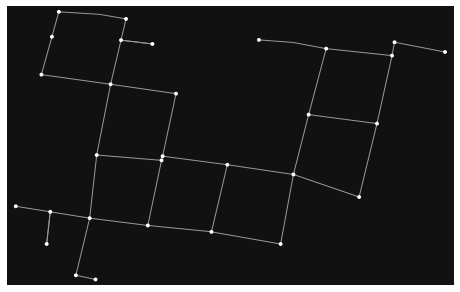

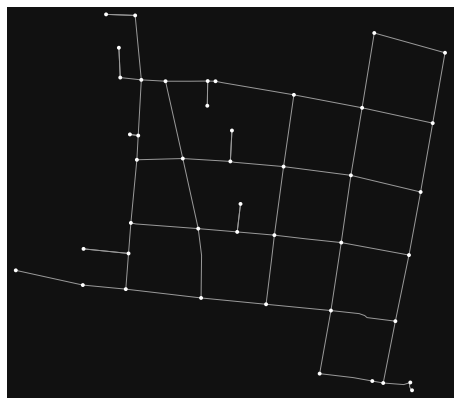

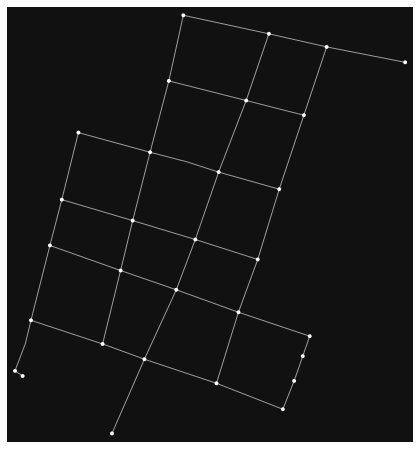

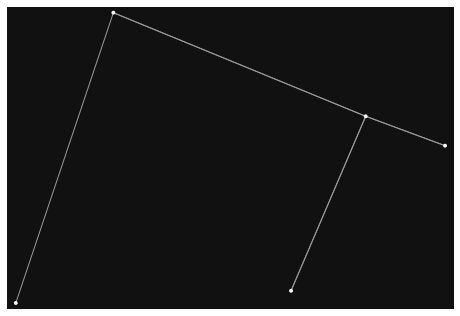

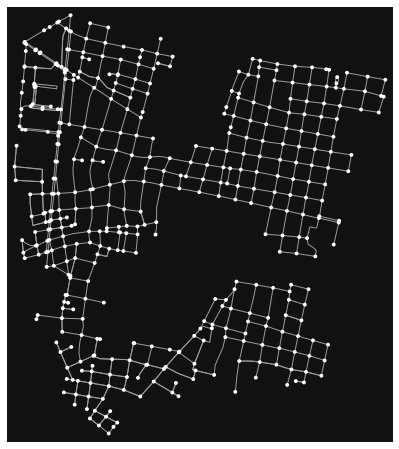

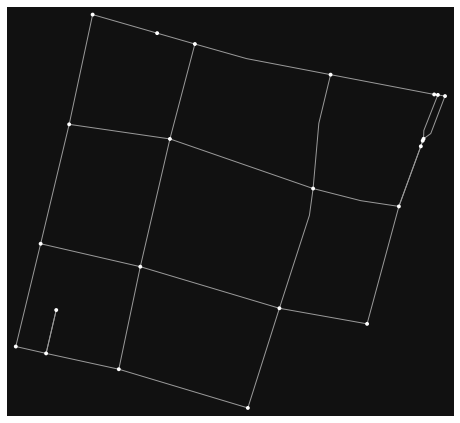

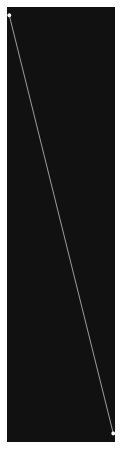

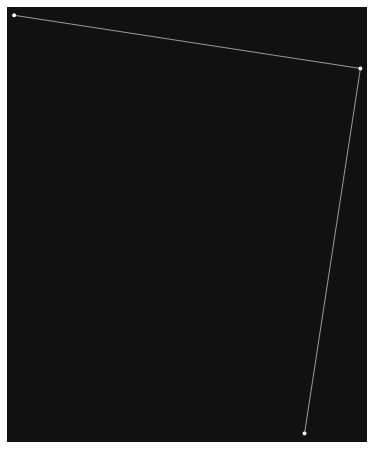

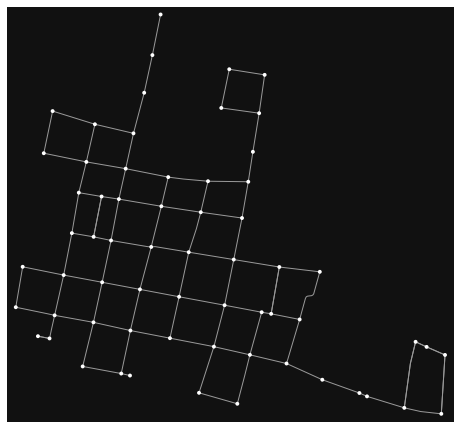

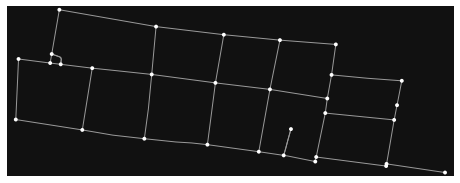

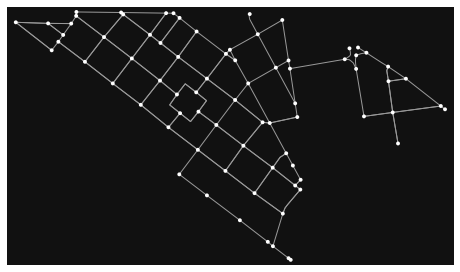

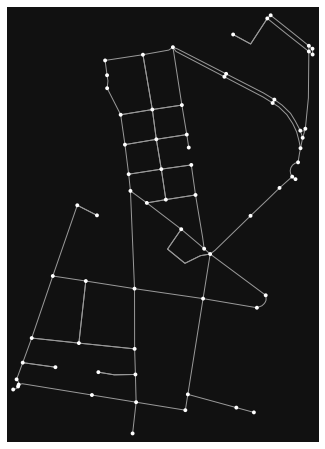

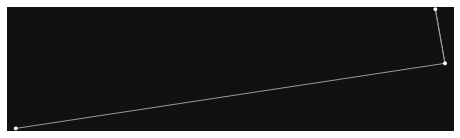

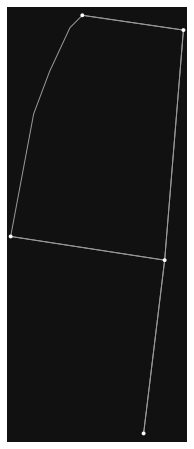

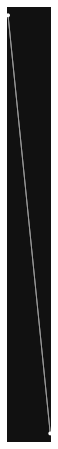

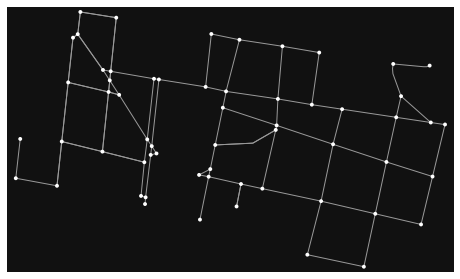

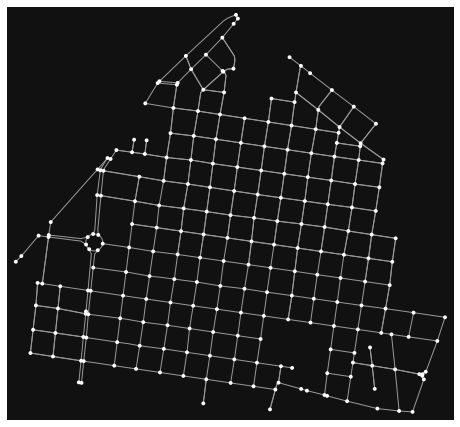

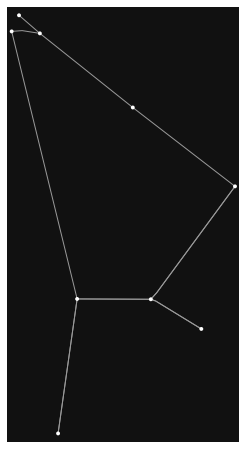

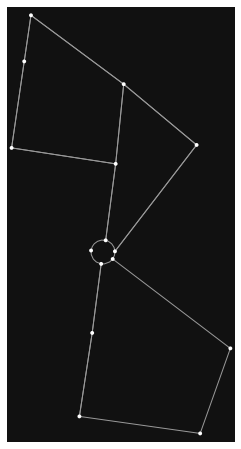

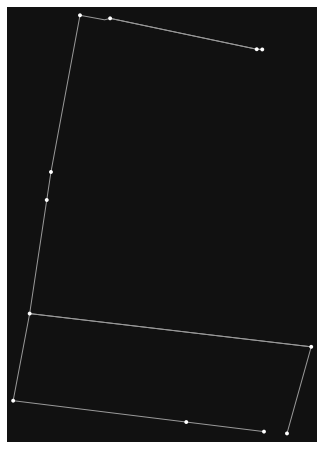

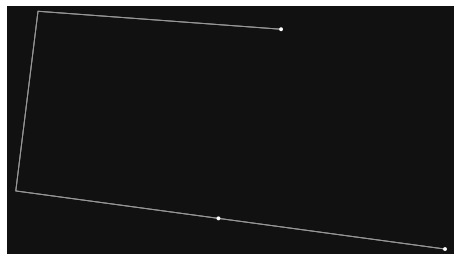

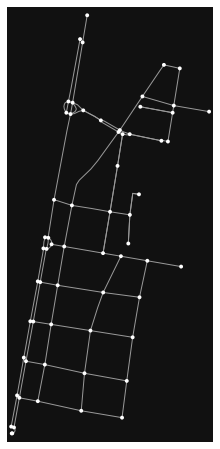

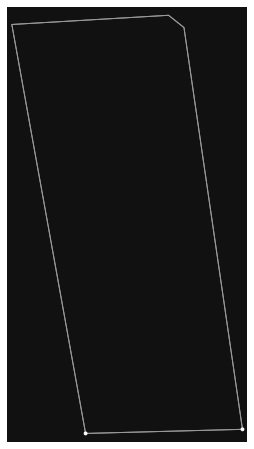

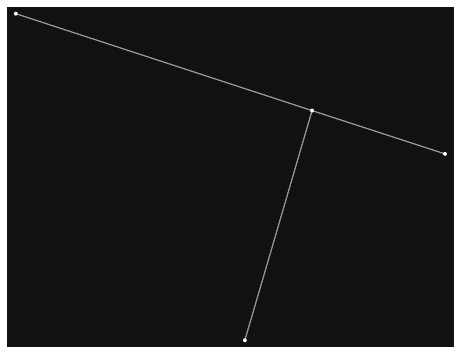

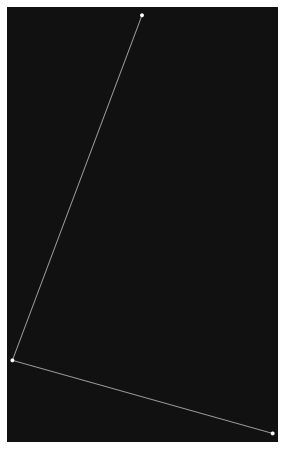

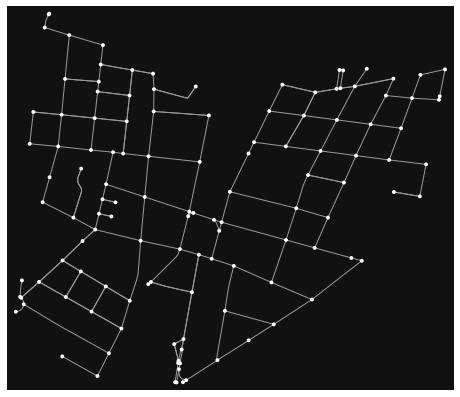

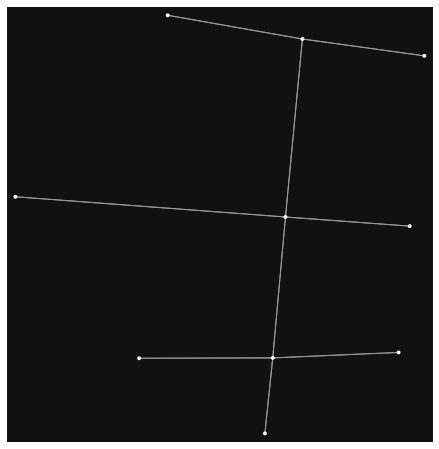

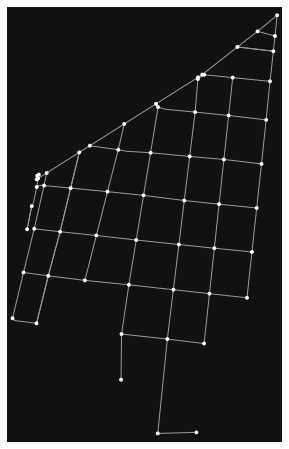

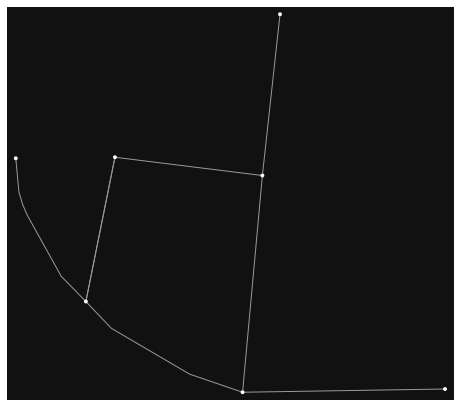

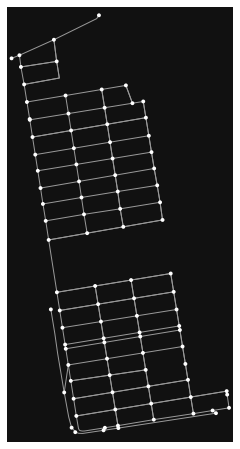

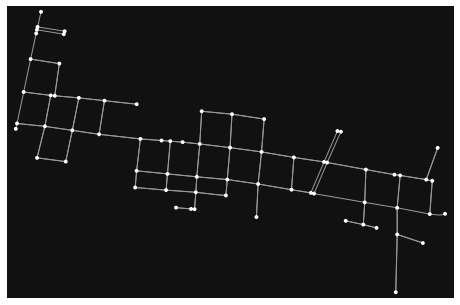

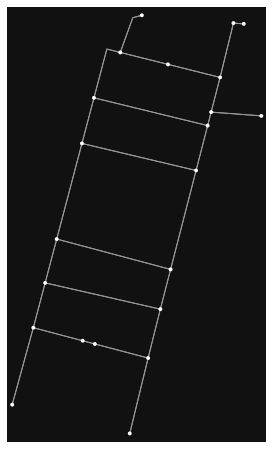

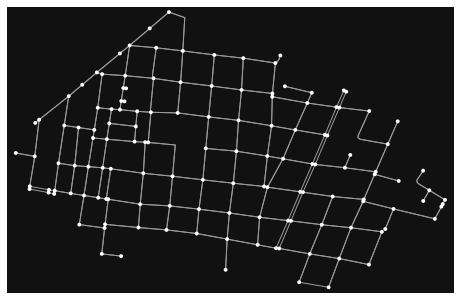

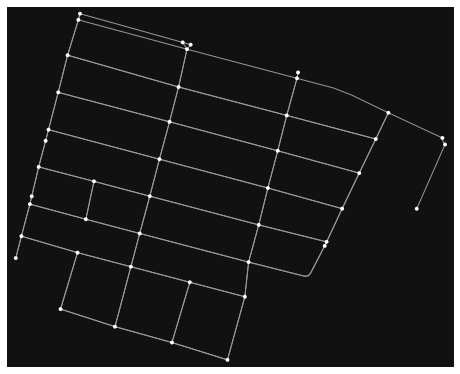

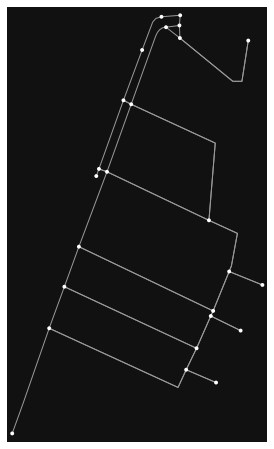

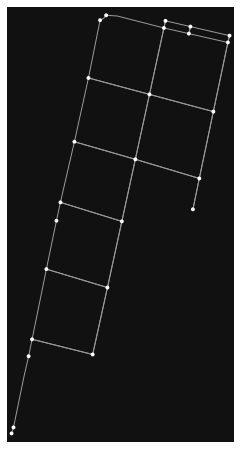

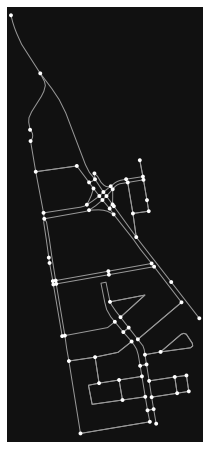

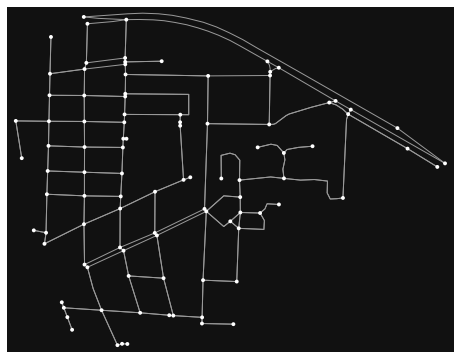

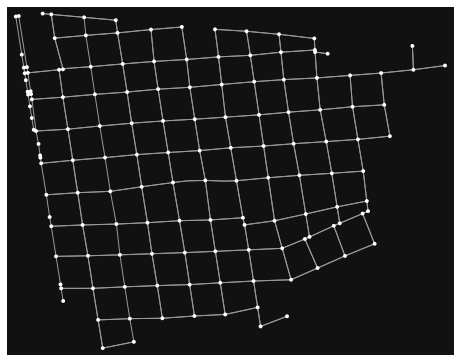

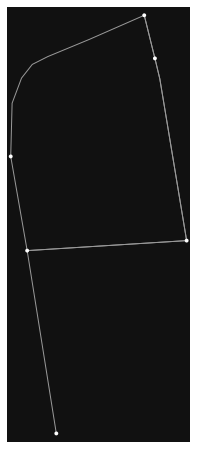

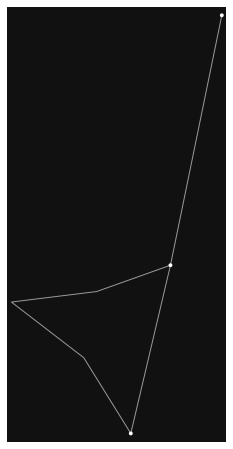

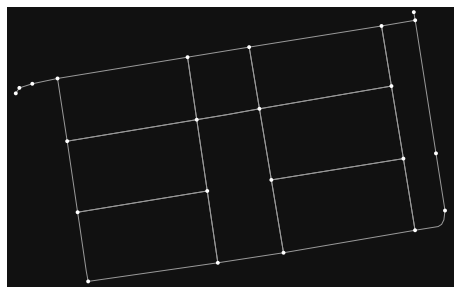

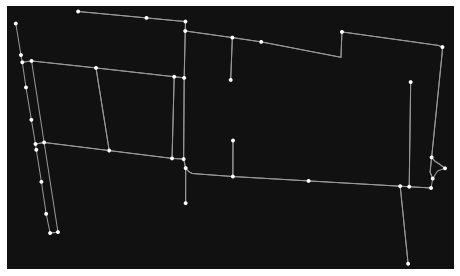

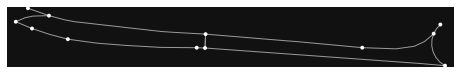

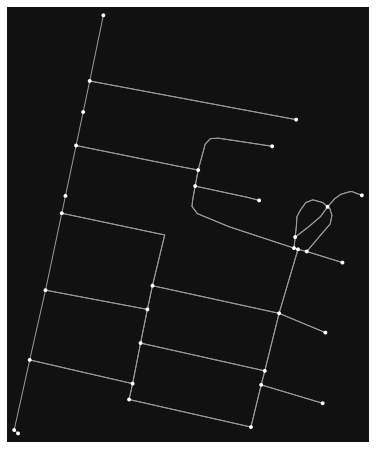

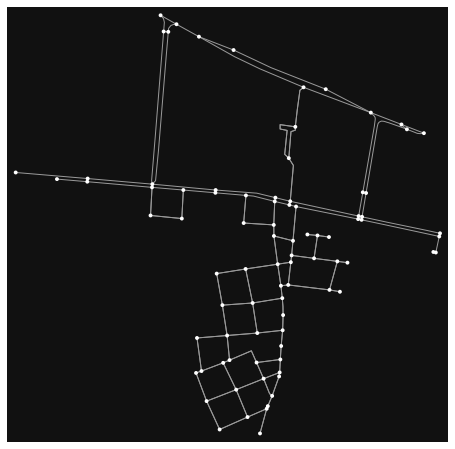

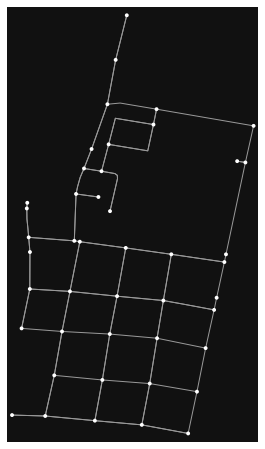

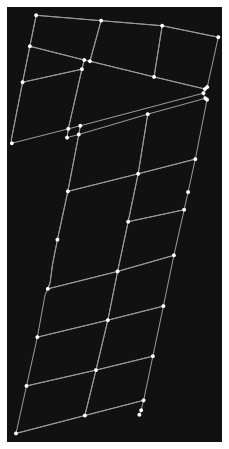

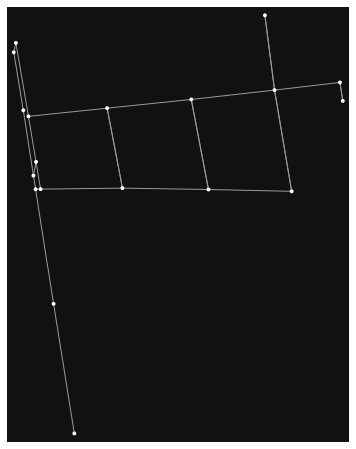

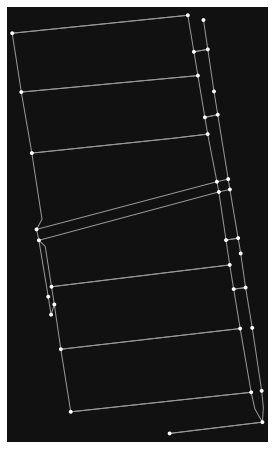

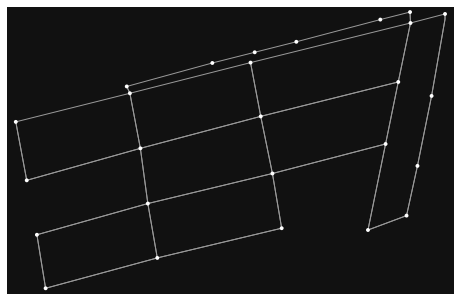

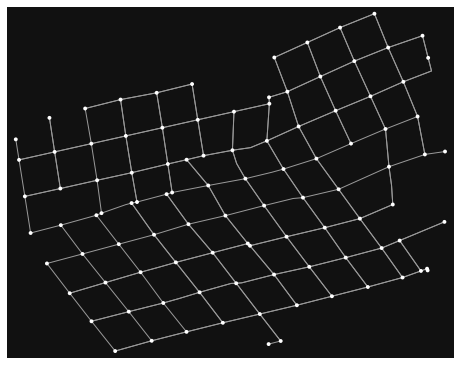

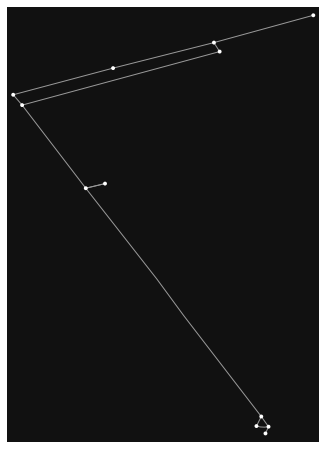

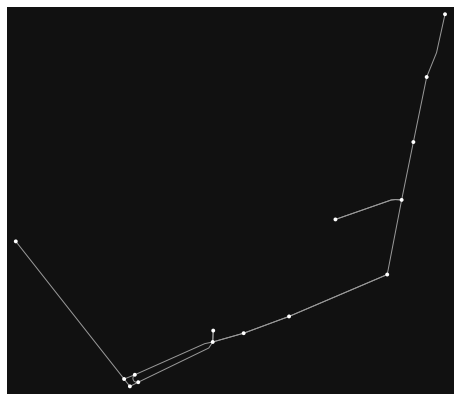

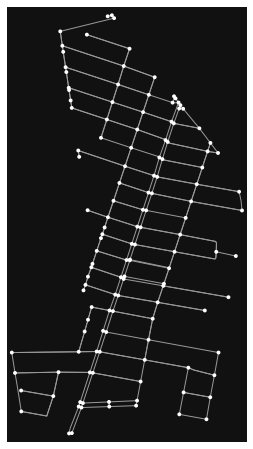

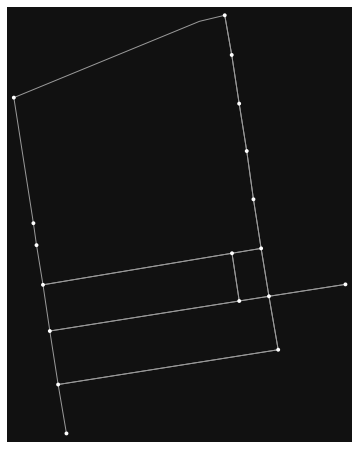

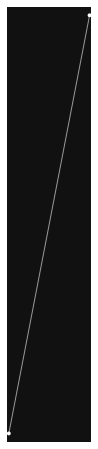

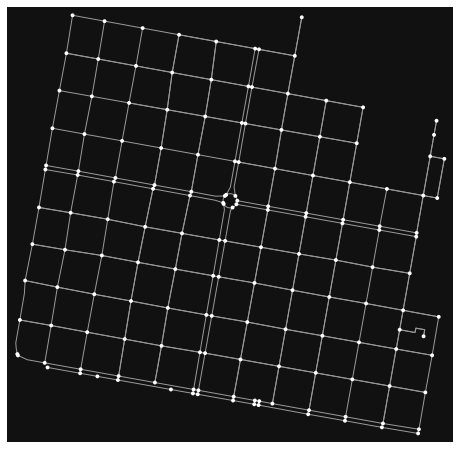

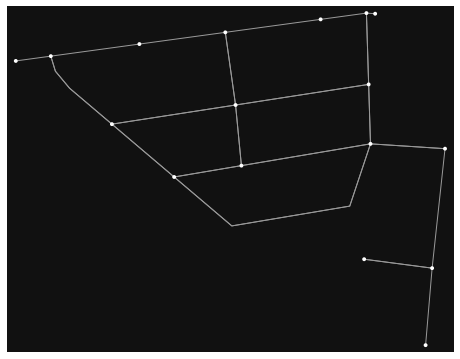

In [ ]:
#get road network from each colonia polygon, ignore those colonias where there is no road (at least two linked nodes)
#for polygon in colonias_yucatan_merida['geometry']:
#    try:
#        G_colonia = ox.graph_from_polygon(polygon, network_type='drive')
#        ox.plot_graph(G_colonia)
#    except:
#        pass